<font color='blue' size=6><b>Demo - Week 8 Worksheet Suggested Solutions</b></font>

In [58]:
install.packages('repr',repos='https://cran.ma.imperial.ac.uk/')
library(repr)

Warning message:
"package 'repr' is in use and will not be installed"

In [63]:
library(tidyverse) ### for augment
library(broom)

In [64]:
install.packages('lmtest',repos='https://cran.ma.imperial.ac.uk/')
library(lmtest)

Warning message:
"package 'lmtest' is in use and will not be installed"

In [65]:
install.packages('car',repos='https://cran.ma.imperial.ac.uk/')
library(car)

Warning message:
"package 'car' is in use and will not be installed"

In [66]:
install.packages('aod',repos='https://cran.ma.imperial.ac.uk/')
library(aod)

Warning message:
"package 'aod' is in use and will not be installed"

<font color='blue' size=5><b> Suggested solutions to Part 1 (datafile childagg) </b></font>

In [67]:
getwd()
childagg<-read.table(file="../Data/childagg.txt",sep=',',header = T)

[1] "C:/Users/smaap2/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

In [68]:
head(childagg)

aggression,television,computer.games,sibling.aggression,diet,parenting.style
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.37416043,0.172670536,0.1419067,-0.32821637,-0.1103028,-0.2790339
0.77115340,-0.032871842,0.7099182,0.57683667,-0.0229903,-1.2481665
-0.09772758,-0.074460205,-0.3901406,-0.21718405,0.2803005,-0.3280630
0.01593531,-0.004426631,-0.4080804,0.04622325,-0.2634792,-1.0051193
-0.27538459,-0.675238690,-0.2777778,-0.89104538,0.2265814,0.4894778
0.15785330,0.202480135,0.3215083,-0.15371262,-0.3686382,-1.7409823


<font color='blue' size=3> A study was carried out to explore the relationship between aggression in children having an older
sibling and several potential factors that might influence the level of agression. The measured
variables are as follows. </font> <br>
<font color='darkblue' size=2>
parenting style: high scores correspond to bad parenting<br>
computer games: high scores indicate more time spent playing computer games<br>
television: high scores indicate more time spent watching television<br>
diet: high scores indicate that the child has a healthy diet<br>
sibling agression: high scores indicate more aggression by the older sibling </font> <br>
<font color='blue' size=3> 
Firstly construct a linear regression model of the relationship between agression in children having an
older sibling. Then construct a multivariate linear regression with the all the variables. </font>

In [69]:
###First part of question
model1 <- lm(aggression ~ sibling.aggression, data = childagg) ; model1


Call:
lm(formula = aggression ~ sibling.aggression, data = childagg)

Coefficients:
       (Intercept)  sibling.aggression  
         -0.006057            0.126406  


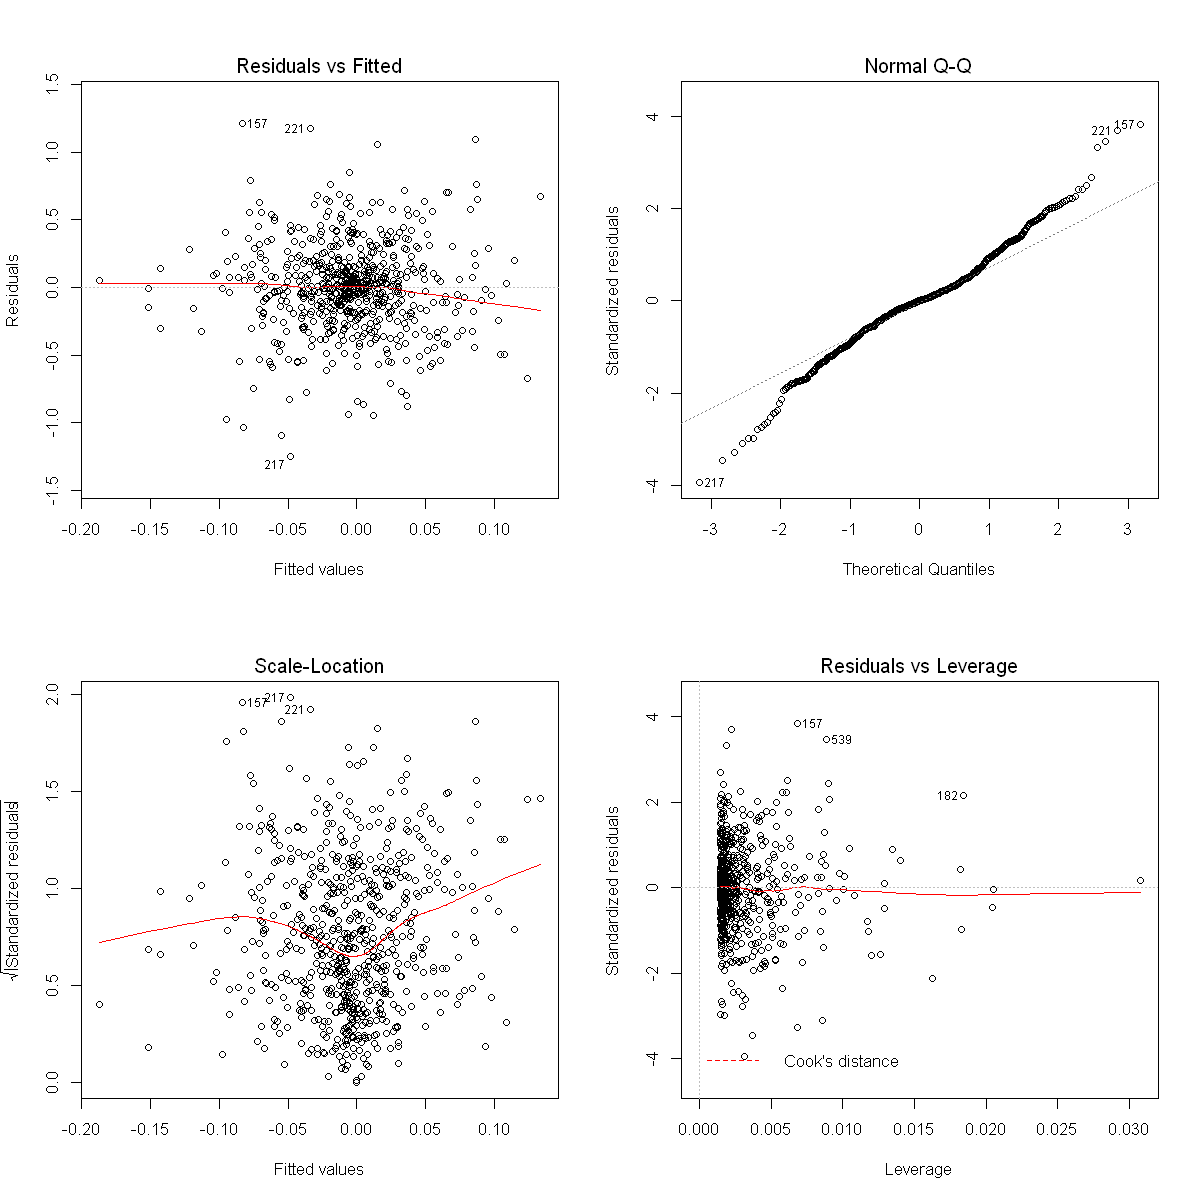

In [70]:
options(repr.plot.width=10, repr.plot.height=10) ####fits plots in to a nice display
par(mfrow=c(2,2))

plot(model1)

In [71]:
aggression <- childagg[[1]]
sibling.aggression <- childagg[[4]]

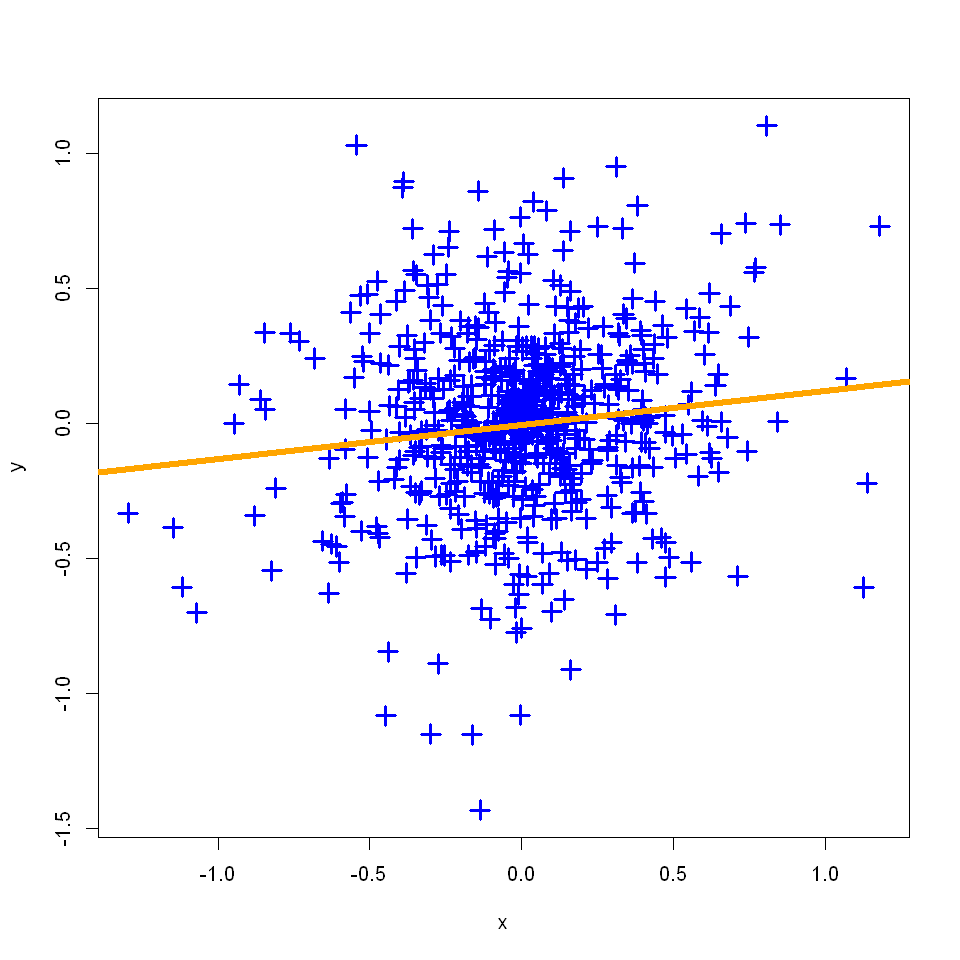

In [72]:
options(repr.plot.width=8, repr.plot.height=8)

plot(aggression, sibling.aggression, pch=3, col='blue',
     xlab='x', ylab='y', cex=1.5, lwd=3)

abline(a=as.double(model1$coefficients[1]),
       b=as.double(model1$coefficients[2]), lwd=5, col='orange')

In [73]:
dwtest(model1, alternative='two.sided')


	Durbin-Watson test

data:  model1
DW = 1.9035, p-value = 0.2126
alternative hypothesis: true autocorrelation is not 0


In [74]:
durbinWatsonTest(model1)

 lag Autocorrelation D-W Statistic p-value
   1      0.04612827      1.903462     0.2
 Alternative hypothesis: rho != 0

In [75]:
###first Model at 95% confidence interval ###Or 90% confidence interval to include another variable.
firstmodel <- lm(aggression ~ sibling.aggression+television+computer.games+diet+parenting.style, data = childagg) 
summary(firstmodel)



Call:
lm(formula = aggression ~ sibling.aggression + television + computer.games + 
    diet + parenting.style, data = childagg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12629 -0.15253 -0.00421  0.15222  1.17669 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.004988   0.011983  -0.416 0.677350    
sibling.aggression  0.081684   0.038780   2.106 0.035550 *  
television          0.032916   0.046057   0.715 0.475059    
computer.games      0.142161   0.036920   3.851 0.000129 ***
diet               -0.109054   0.038076  -2.864 0.004315 ** 
parenting.style     0.056648   0.014557   3.891 0.000110 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3071 on 660 degrees of freedom
Multiple R-squared:  0.08258,	Adjusted R-squared:  0.07563 
F-statistic: 11.88 on 5 and 660 DF,  p-value: 5.025e-11


In [76]:
model.diag.metrics <- augment(firstmodel)
head(model.diag.metrics)

aggression,sibling.aggression,television,computer.games,diet,parenting.style,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.37416043,-0.32821637,0.172670536,0.1419067,-0.1103028,-0.2790339,-0.009718582,0.02292332,0.38387901,0.005572235,0.3069548,1.467556e-03,1.2535595
0.77115340,0.57683667,-0.032871842,0.7099182,-0.0229903,-1.2481665,0.073772100,0.03937942,0.69738130,0.016444209,0.3060977,1.461096e-02,2.2898551
-0.09772758,-0.21718405,-0.074460205,-0.3901406,0.2803005,-0.3280630,-0.129794389,0.02441882,0.03206681,0.006323009,0.3073183,1.163772e-05,0.1047539
0.01593531,0.04622325,-0.004426631,-0.4080804,-0.2634792,-1.0051193,-0.087575819,0.02379088,0.10351113,0.006001990,0.3072943,1.150327e-04,0.3380893
-0.27538459,-0.89104538,-0.675238690,-0.2777778,0.2265814,0.4894778,-0.136469541,0.04765507,-0.13891505,0.024082008,0.3072721,8.623584e-04,-0.4579097
0.15785330,-0.15371262,0.202480135,0.3215083,-0.3686382,-1.7409823,-0.023594864,0.03831315,0.18144816,0.015565750,0.3072383,9.345981e-04,0.5955201


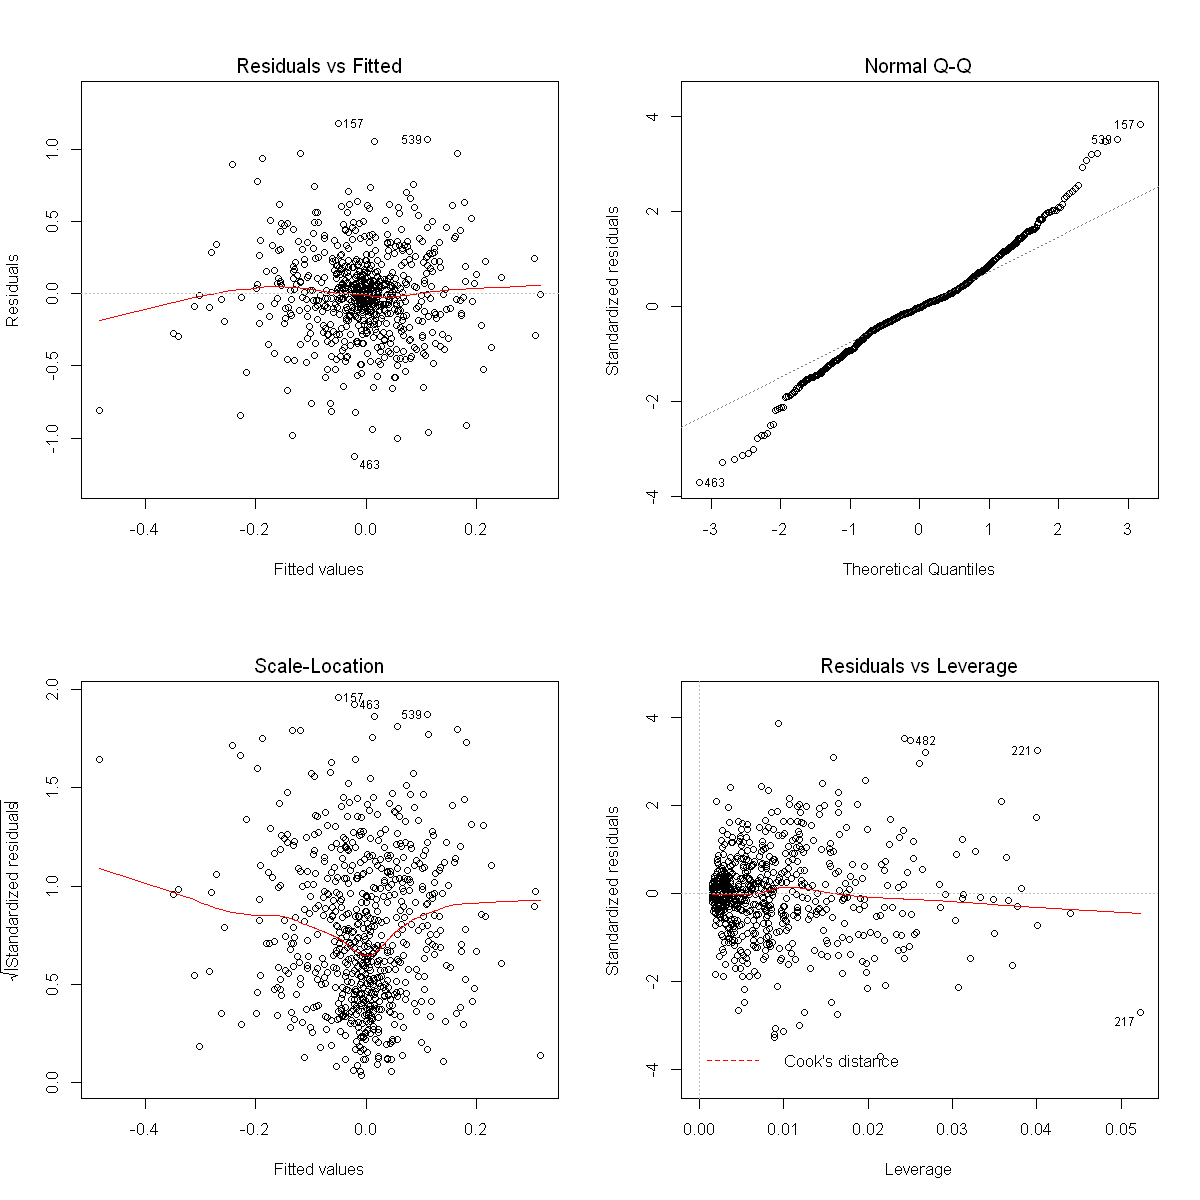

In [77]:
options(repr.plot.width=10, repr.plot.height=10) ####fits plots in to a nice display
par(mfrow=c(2,2))

plot(firstmodel)

In [78]:
###Removing variables that are not in the 95 percent confidence interval
secondmodel <- lm(aggression ~ sibling.aggression+computer.games+diet+parenting.style, data = childagg) 
summary(secondmodel)


Call:
lm(formula = aggression ~ sibling.aggression + computer.games + 
    diet + parenting.style, data = childagg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15286 -0.15349 -0.00189  0.15753  1.18037 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.005917   0.011908  -0.497  0.61941    
sibling.aggression  0.086311   0.038221   2.258  0.02426 *  
computer.games      0.143442   0.036862   3.891  0.00011 ***
diet               -0.111644   0.037890  -2.947  0.00333 ** 
parenting.style     0.061892   0.012568   4.925 1.07e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.307 on 661 degrees of freedom
Multiple R-squared:  0.08187,	Adjusted R-squared:  0.07631 
F-statistic: 14.74 on 4 and 661 DF,  p-value: 1.541e-11


In [79]:
model.diag.metrics <- augment(secondmodel)
head(model.diag.metrics)

aggression,sibling.aggression,computer.games,diet,parenting.style,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.37416043,-0.32821637,0.1419067,-0.1103028,-0.2790339,-0.01884587,0.01902915,0.39300630,0.003842684,0.3068242,1.269415e-03,1.2827249
0.77115340,0.57683667,0.7099182,-0.0229903,-1.2481665,0.07101778,0.03917587,0.70013562,0.016286710,0.3059755,1.751002e-02,2.2995660
-0.09772758,-0.21718405,-0.3901406,0.2803005,-0.3280630,-0.13222350,0.02417217,0.03449593,0.006200506,0.3072038,1.585591e-05,0.1127240
0.01593531,0.04622325,-0.4080804,-0.2634792,-1.0051193,-0.09325641,0.02241553,0.10919172,0.005332047,0.3071772,1.363776e-04,0.3566553
-0.27538459,-0.89104538,-0.2777778,0.2265814,0.4894778,-0.11767119,0.03972382,-0.15771340,0.016745496,0.3071444,9.143853e-04,-0.5181239
0.15785330,-0.15371262,0.3215083,-0.3686382,-1.7409823,-0.03966295,0.03101136,0.19751625,0.010205578,0.3071096,8.625399e-04,0.6467379


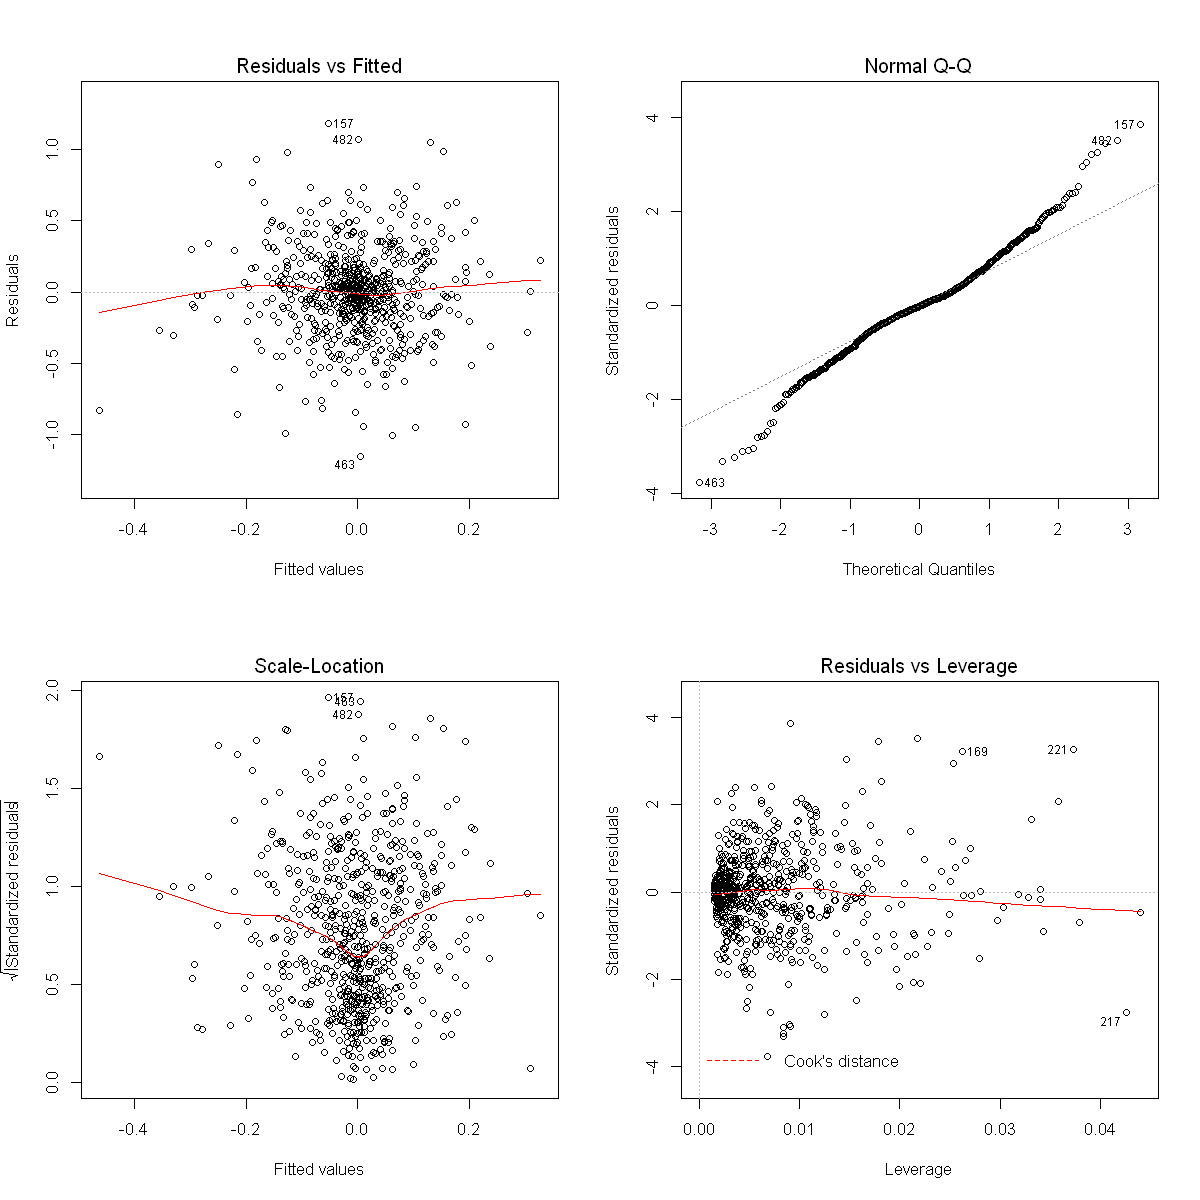

In [80]:
options(repr.plot.width=10, repr.plot.height=10) ####fits plots in to a nice display
par(mfrow=c(2,2))

plot(secondmodel)

In [81]:
aggression <- childagg[[1]]
sibling.aggression <- childagg[[4]]
diet<-childagg[[5]]
computer.games<-childagg[[3]]
parenting.style<-childagg[[6]]

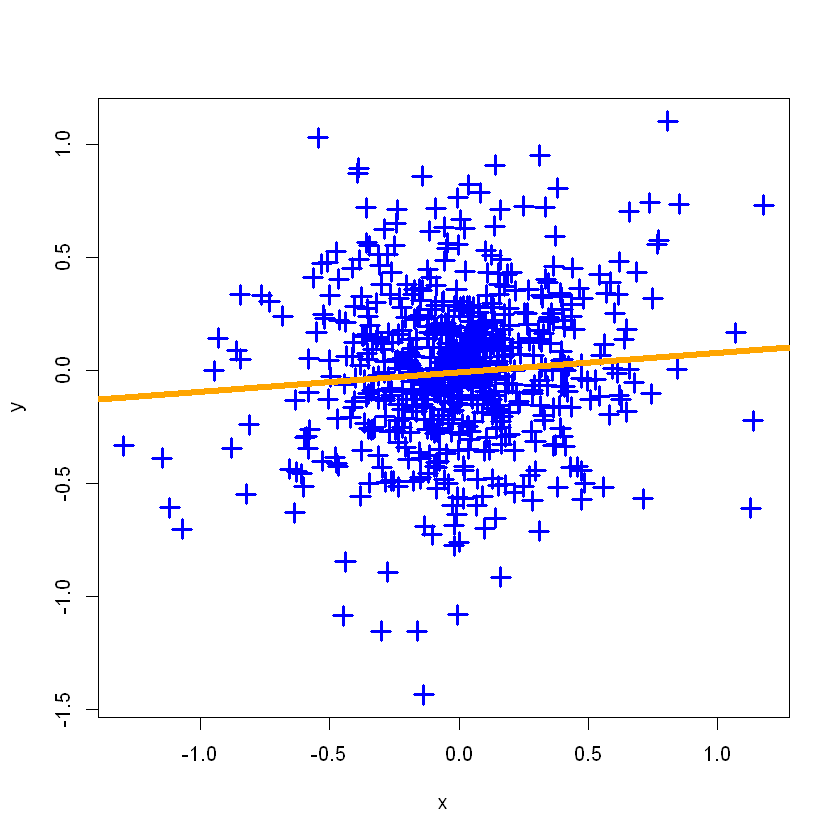

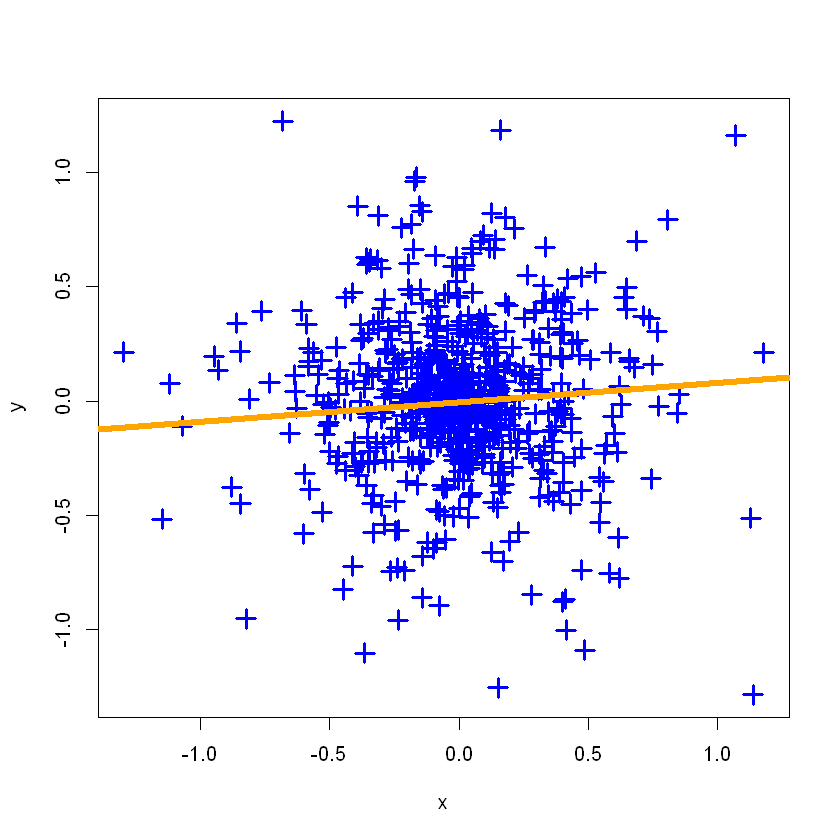

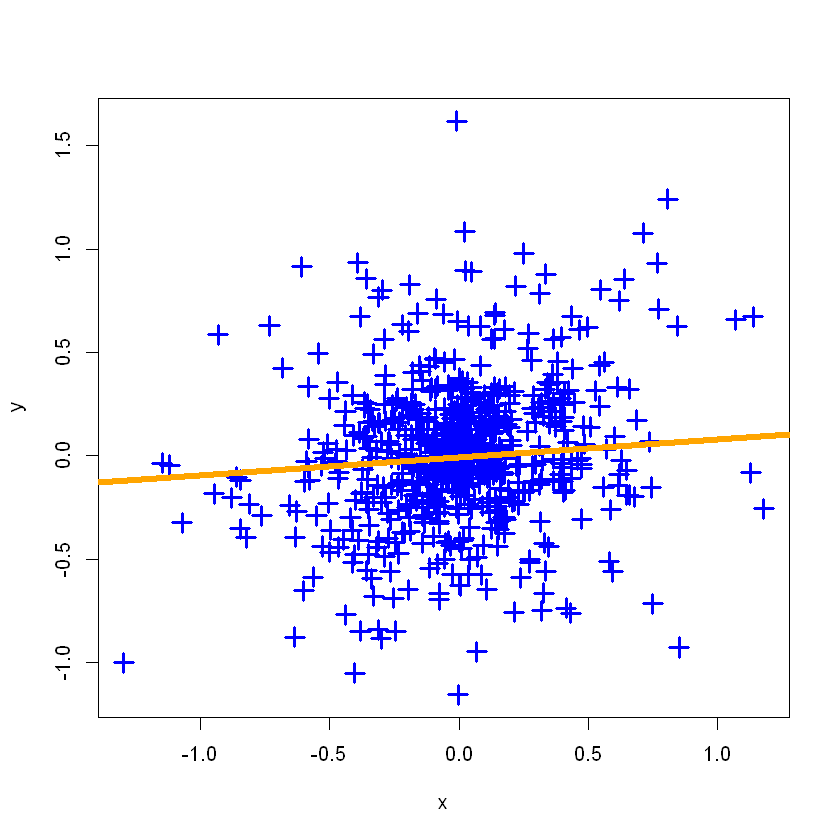

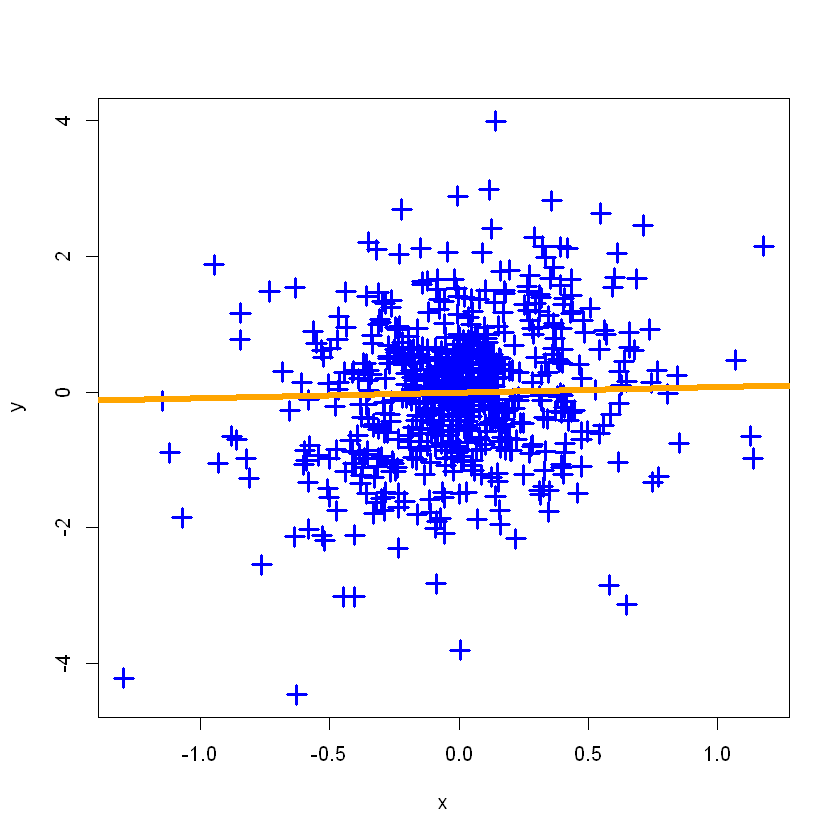

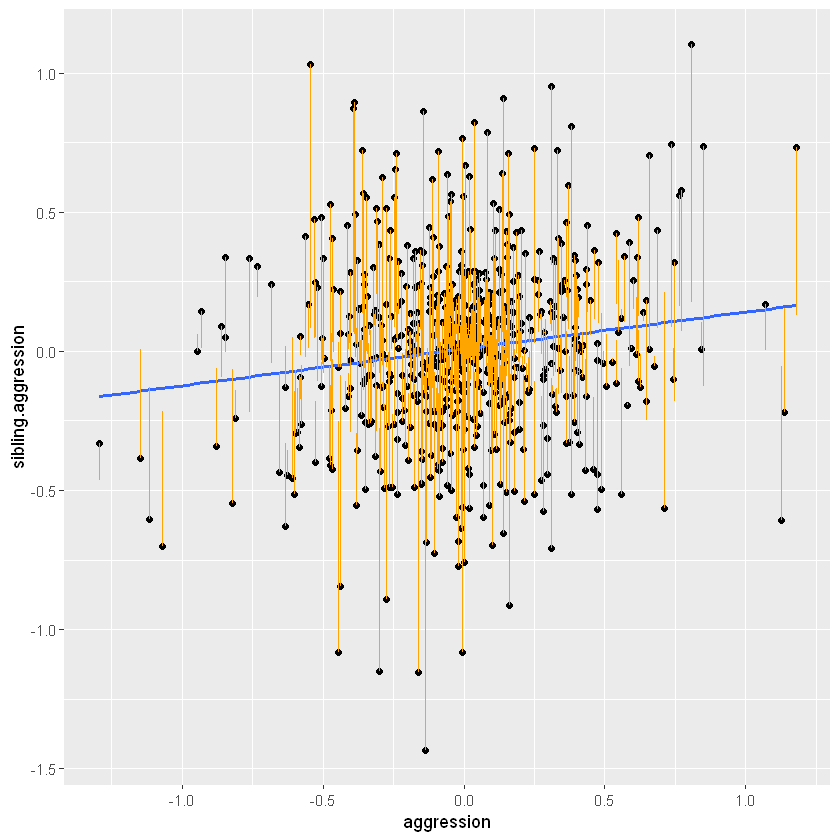

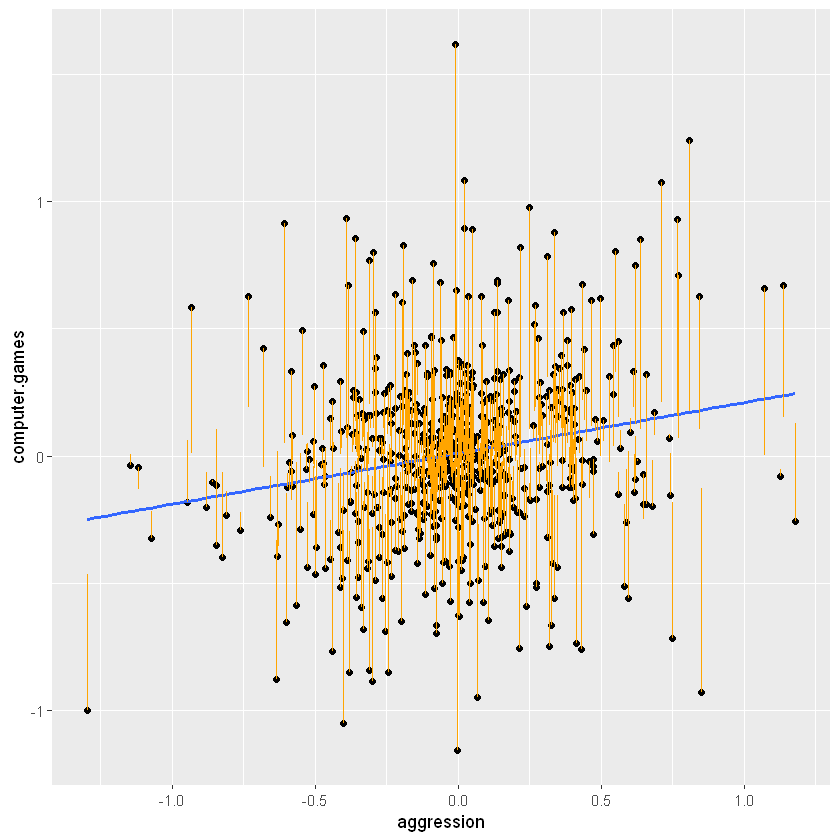

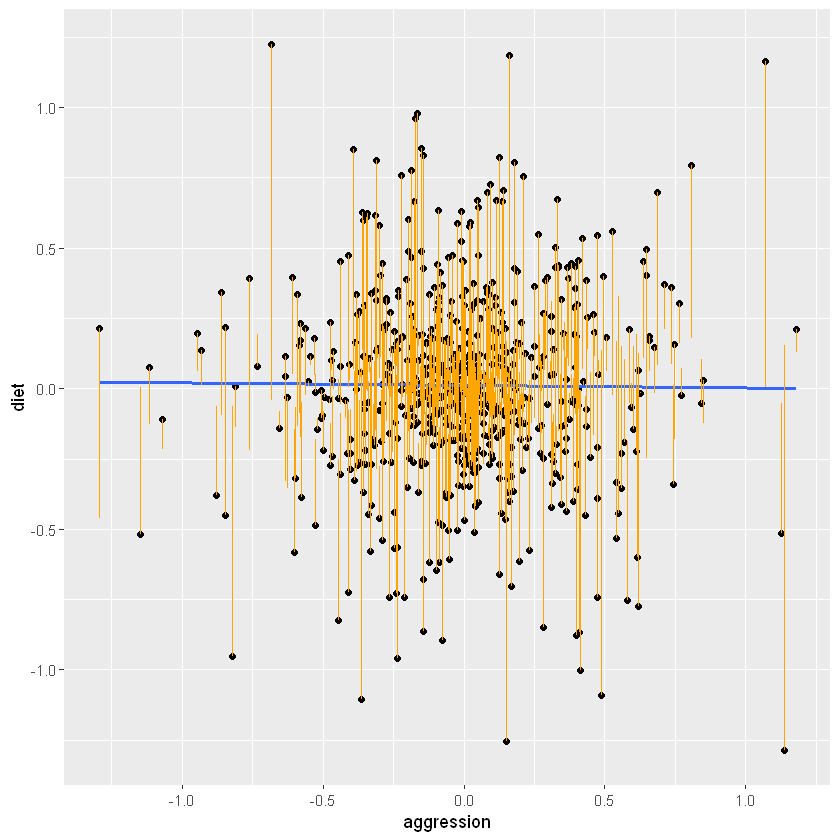

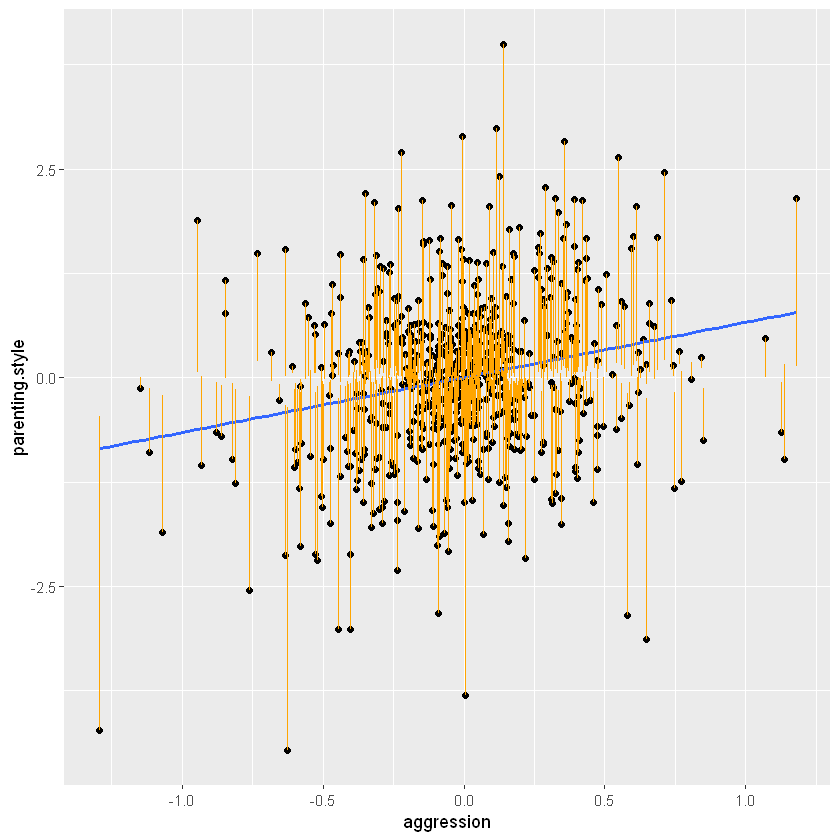

In [82]:
options(repr.plot.width=7, repr.plot.height=7)

plot(aggression, sibling.aggression, pch=3, col='blue',
     xlab='x', ylab='y', cex=1.5, lwd=3)
abline(a=as.double(secondmodel$coefficients[1]),
       b=as.double(secondmodel$coefficients[2]), lwd=5, col='orange')
plot(aggression, diet, pch=3, col='blue',
     xlab='x', ylab='y', cex=1.5, lwd=3)
abline(a=as.double(secondmodel$coefficients[1]),
       b=as.double(secondmodel$coefficients[2]), lwd=5, col='orange')
plot(aggression,computer.games, pch=3, col='blue',
     xlab='x', ylab='y', cex=1.5, lwd=3)
abline(a=as.double(secondmodel$coefficients[1]),
       b=as.double(secondmodel$coefficients[2]), lwd=5, col='orange')
plot(aggression, parenting.style, pch=3, col='blue',
     xlab='x', ylab='y', cex=1.5, lwd=3)
abline(a=as.double(secondmodel$coefficients[1]),
       b=as.double(secondmodel$coefficients[2]), lwd=5, col='orange')

ggplot(model.diag.metrics, aes(aggression, sibling.aggression)) + ###different way of displaying
  geom_point() +
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = aggression, yend = .fitted), color = "orange", size = 0.3)

ggplot(model.diag.metrics, aes(aggression, computer.games)) + ###different way of displaying
  geom_point() +
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = aggression, yend = .fitted), color = "orange", size = 0.3)

ggplot(model.diag.metrics, aes(aggression,diet )) + ###different way of displaying
  geom_point() +
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = aggression, yend = .fitted), color = "orange", size = 0.3)

ggplot(model.diag.metrics, aes(aggression, parenting.style)) + ###different way of displaying
  geom_point() +
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = aggression, yend = .fitted), color = "orange", size = 0.3)


In [83]:
dwtest(secondmodel, alternative='two.sided')


	Durbin-Watson test

data:  secondmodel
DW = 1.9107, p-value = 0.2501
alternative hypothesis: true autocorrelation is not 0


In [84]:
durbinWatsonTest(secondmodel)

 lag Autocorrelation D-W Statistic p-value
   1       0.0431701      1.910742   0.232
 Alternative hypothesis: rho != 0

<font color='blue' size=5><b> Suggested solutions to Part 2 (datafile burnout) </b></font>

In [85]:
burnout<-read.table(file="../Data/burnout.txt",sep=',',header = T)

In [86]:
head(burnout)

burnout,loc,cope,teaching,research,pastoral
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Not-Burnt-Out,7.647059,9.160305,32.72727,87.50000,31.48148
Not-Burnt-Out,6.470588,12.977099,52.72727,66.66667,68.51852
Not-Burnt-Out,8.823529,9.160305,49.09091,60.41667,53.70370
Not-Burnt-Out,20.000000,9.160305,52.72727,62.50000,50.00000
Not-Burnt-Out,6.470588,19.083969,43.63636,79.16667,40.74074
Not-Burnt-Out,7.058824,16.030534,38.18182,52.08333,48.14815


<font color='blue' size=3> Research has shown that lecturers are among the most stressed workers. A researcher took a
large sample of lecturers and administered several questionnaires to them that measured the
following variables: </font> <br>
<font color='darkblue' size=2>
burnout: burnt out or not<br>
perceived control: high score indicates low perceived control<br>
coping style: high score indicates a good ability to cope with stress<br>
stress from teaching: high score indicates that teaching is stressful<br>
stress from research: high score indicates that research is stressful<br>
stress from pastoral care: high score indicates that pastoral care is stressful </font> <br>
<font color='blue' size=3> 
Construct a linear regression model of the relationship between burnout and these potential
explanatory variables. Discuss how well your model fits the data, how much variation in burnout
is accounted for by the model, and the individual impact of each explanatory variable on the
probability that an individual lecturer burns out. </font>

In [87]:
burnoutcol <- burnout[[1]]
loc <- burnout[[2]]
cope <- burnout[[3]]
teach <- burnout[[4]]
res <- burnout[[5]]
past <- burnout [[6]]

In [88]:
notbo <- burnout[burnout$burnout=="Not-Burnt-Out", c(2,3,4,5,6)] ### split into burnt-out and not-burnt-out
bo <- burnout[burnout$burnout=="Burnt-Out", c(2,3,4,5,6)]

a<- (notbo[['loc']])
length(a)
b<- (bo[['loc']])
length(b)

[1] 348

[1] 119

In [89]:
bo_vs_loc <- lm(loc ~ burnoutcol, data = burnout) ; bo_vs_loc
bo_vs_cope <- lm(cope ~ burnoutcol, data = burnout) ; bo_vs_cope
bo_vs_teach <- lm(teach ~ burnoutcol, data = burnout) ; bo_vs_teach
bo_vs_res <- lm(res ~ burnoutcol, data = burnout) ; bo_vs_res
bo_vs_past <- lm(past ~ burnoutcol, data = burnout) ; bo_vs_past


Call:
lm(formula = loc ~ burnoutcol, data = burnout)

Coefficients:
            (Intercept)  burnoutcolNot-Burnt-Out  
                 25.289                   -9.916  



Call:
lm(formula = cope ~ burnoutcol, data = burnout)

Coefficients:
            (Intercept)  burnoutcolNot-Burnt-Out  
                  38.25                   -19.23  



Call:
lm(formula = teach ~ burnoutcol, data = burnout)

Coefficients:
            (Intercept)  burnoutcolNot-Burnt-Out  
                 61.482                   -8.128  



Call:
lm(formula = res ~ burnoutcol, data = burnout)

Coefficients:
            (Intercept)  burnoutcolNot-Burnt-Out  
                 58.981                    3.926  



Call:
lm(formula = past ~ burnoutcol, data = burnout)

Coefficients:
            (Intercept)  burnoutcolNot-Burnt-Out  
                  60.40                    -6.91  


In [90]:
model2 <- lm(burnoutcol ~ loc + cope + teach + res + past, data = burnout) ; model2


Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


Call:
lm(formula = burnoutcol ~ loc + cope + teach + res + past, data = burnout)

Coefficients:
(Intercept)          loc         cope        teach          res         past  
   2.100865    -0.013222    -0.017583     0.011304    -0.001563    -0.004131  


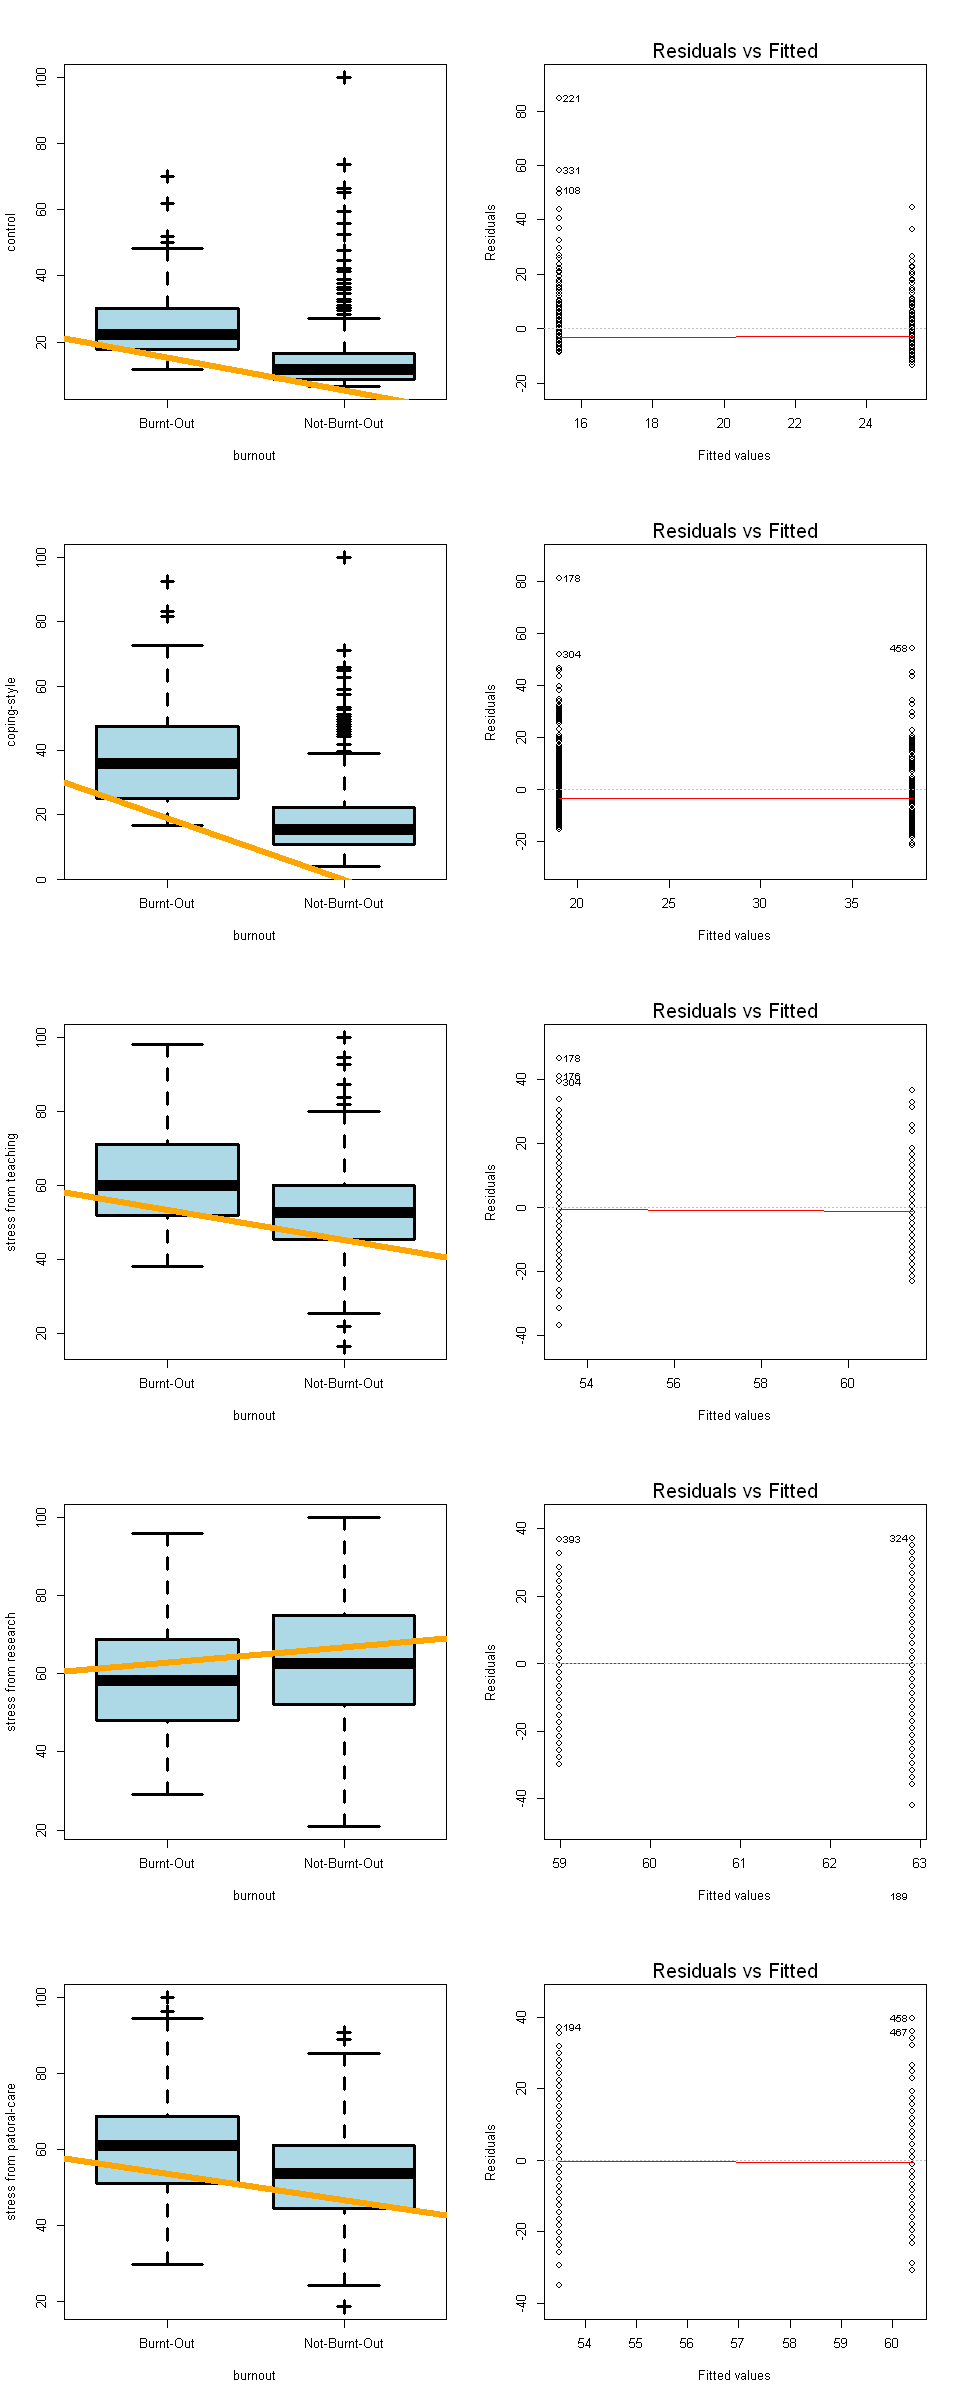

In [91]:
options(repr.plot.width=8, repr.plot.height=20)

par(mfrow=c(5,2))

plot(burnoutcol, loc, pch=3, col='lightblue',
     xlab='burnout', ylab='control', cex=1.5, lwd=3)
abline(a=as.double(bo_vs_loc$coefficients[1]),
       b=as.double(bo_vs_loc$coefficients[2]), lwd=5, col='orange')

plot(bo_vs_loc, 1)

plot(burnoutcol, cope, pch=3, col='lightblue',
     xlab='burnout', ylab='coping-style', cex=1.5, lwd=3)
abline(a=as.double(bo_vs_cope$coefficients[1]),
       b=as.double(bo_vs_cope$coefficients[2]), lwd=5, col='orange')

plot(bo_vs_cope, 1)

plot(burnoutcol, teach, pch=3, col='lightblue', 
     xlab='burnout',ylab='stress from teaching', cex=1.5, lwd=3)
abline(a=as.double(bo_vs_teach$coefficients[1]),
       b=as.double(bo_vs_teach$coefficients[2]), lwd=5, col='orange')

plot(bo_vs_teach, 1)

plot(burnoutcol, res, pch=3, col='lightblue', 
     xlab='burnout',ylab='stress from research', cex=1.5, lwd=3)
abline(a=as.double(bo_vs_res$coefficients[1]),
       b=as.double(bo_vs_res$coefficients[2]), lwd=5, col='orange')

plot(bo_vs_res, 1)

plot(burnoutcol, past, pch=3, col='lightblue', 
     xlab='burnout',ylab='stress from patoral-care', cex=1.5, lwd=3)
abline(a=as.double(bo_vs_past$coefficients[1]),
       b=as.double(bo_vs_past$coefficients[2]), lwd=5, col='orange')

plot(bo_vs_past, 1)


In [92]:
dwtest(bo_vs_loc, alternative='two.sided')
dwtest(bo_vs_cope, alternative='two.sided')
dwtest(bo_vs_teach, alternative='two.sided')
dwtest(bo_vs_res, alternative='two.sided')
dwtest(bo_vs_past, alternative='two.sided')


	Durbin-Watson test

data:  bo_vs_loc
DW = 1.7714, p-value = 0.01168
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  bo_vs_cope
DW = 1.6253, p-value = 4.058e-05
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  bo_vs_teach
DW = 1.8816, p-value = 0.1839
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  bo_vs_res
DW = 1.9986, p-value = 0.9509
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  bo_vs_past
DW = 1.9696, p-value = 0.7073
alternative hypothesis: true autocorrelation is not 0


<font color='green' size=3> 1. The box plot burnout with 'control', indicates the data is not normally distributed and has no signficance to a lecture will burn out from this variable.</font>

<font color='green' size=3> 2. The box plot burnout with 'coping-style', indicates the data is not normally distributed and has no signficance to a lecture will burn out from this variable.</font>

<font color='green' size=3> 3. The box plot burnout with 'stress from teaching', indicates the data from 'Burnt-Out' is normally distributed, where 'Not-Burnt-Out' is not normally distributed. Hence, indicating that this variable is signficanct to contributing to the fact a lecture will burn out. </font>

<font color='green' size=3> 4. The box plot burnout with 'stress from reasearch', indicates the data is normally distributed and has signficance to a lecture will burn out from this variable.</font>

<font color='green' size=3> 4. The box plot burnout with 'patoral-care', indicates the data is normally distributed and has signficance to a lecture will burn out from this variable.</font>

<font color='blue' size=5><b> Suggested solutions to Part 3 (datafile chd) </b></font>

In [93]:
chd<-read.table(file="../Data/chd.txt",sep=',',header = T)


In [94]:
head(chd)
summary(chd)

Age,CHD
<int>,<int>
20,0
23,0
24,0
25,0
25,1
26,0


      Age             CHD      
 Min.   :20.00   Min.   :0.00  
 1st Qu.:34.75   1st Qu.:0.00  
 Median :44.00   Median :0.00  
 Mean   :44.38   Mean   :0.42  
 3rd Qu.:55.00   3rd Qu.:1.00  
 Max.   :69.00   Max.   :1.00  

<font color='blue' size=3> A study was conducted to investigate the relationship between age and coronary heart disease.
A total of 100 people of various ages were examined and in each case the presence or absence
of evidence of coronary heart disease was recorded. Construct a logistic regression model to
investigete the relationship between age and evidence of coronary heart disease. </font>

<font color='green' size=3>The code below estimates a logistic regression model using the glm (generalized linear model) function. First, we convert CHD to a factor to indicate that CHD should be treated as a categorical variable. </font>

In [95]:
mydata<-chd
mydata$CHD <- factor(mydata$CHD)
mylogit <- glm(CHD ~ Age, data = mydata, family = "binomial")
summary(mylogit)


Call:
glm(formula = CHD ~ Age, family = "binomial", data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9944  -0.8128  -0.4345   0.8242   2.3608  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.64915    1.17783  -4.796 1.62e-06 ***
Age          0.11704    0.02485   4.709 2.49e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.06  on 99  degrees of freedom
Residual deviance: 104.60  on 98  degrees of freedom
AIC: 108.6

Number of Fisher Scoring iterations: 4


<font color='green' size=3>We can use the confint function to obtain confidence intervals for the coefficient estimates. Note that for logistic models, confidence intervals are based on the profiled log-likelihood function. We can also get CIs based on just the standard errors by using the default method.</font>

In [96]:
## CIs using profiled log-likelihood
confint(mylogit)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-8.16973874,-3.5144433
Age,0.07176586,0.1700013


In [97]:
## CIs using standard errors
confint.default(mylogit)

,2.5 %,97.5 %
(Intercept),-7.95764762,-3.3406521
Age,0.06832985,0.1657543


<font color='green' size=3>We can test for an overall effect of rank using the wald.test function of the aod library. The order in which the coefficients are given in the table of coefficients is the same as the order of the terms in the model. This is important because the wald.test function refers to the coefficients by their order in the model. We use the wald.test function. b supplies the coefficients, while Sigma supplies the variance covariance matrix of the error terms, finally Terms tells R which terms in the model are to be tested, in this case, term 1 (Age).</font>

In [98]:
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), Terms = 1)

Wald test:
----------

Chi-squared test:
X2 = 23.0, df = 1, P(> X2) = 1.6e-06

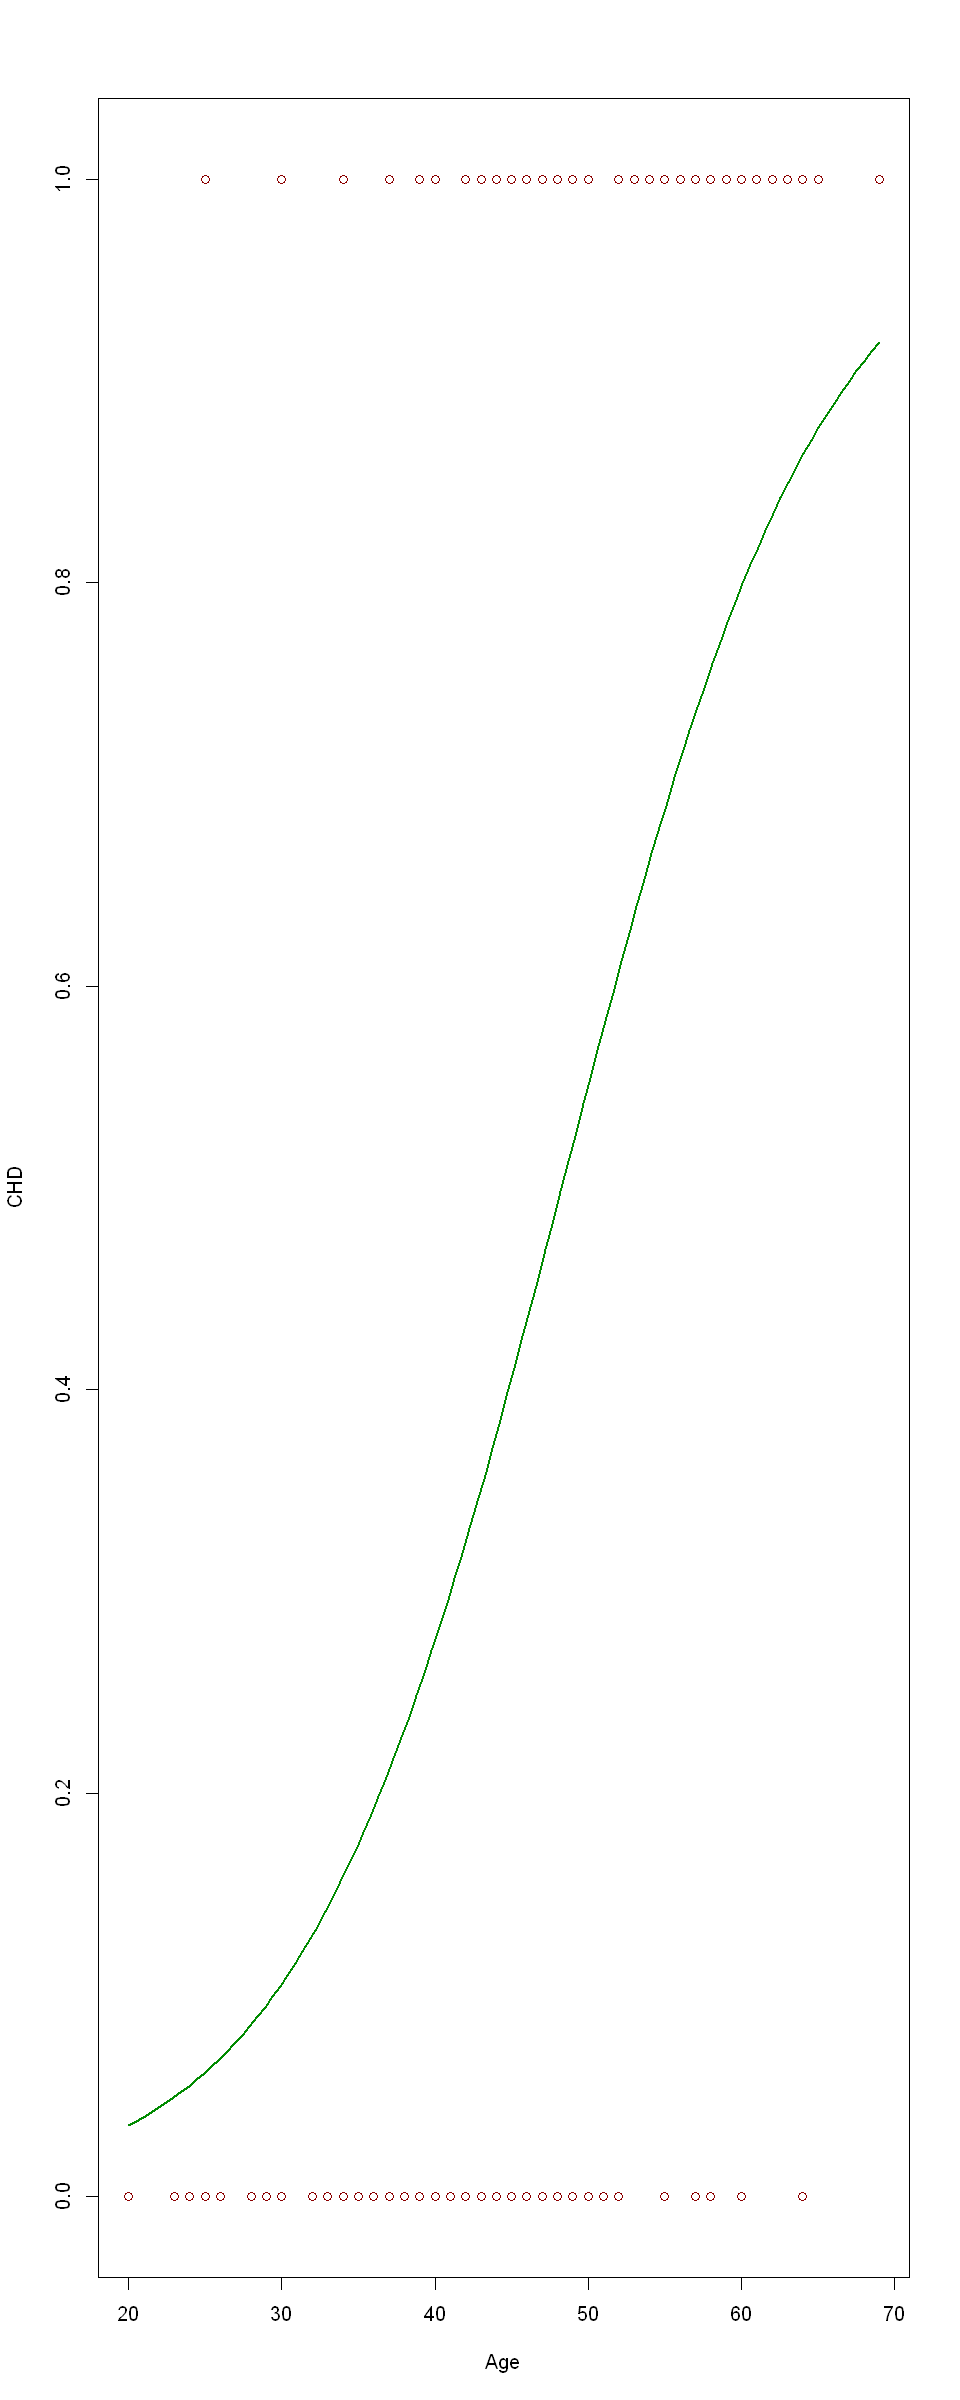

In [99]:
fit = glm(CHD~Age, data=chd, family=binomial)
newdat <- data.frame(Age=seq(min(chd$Age), max(chd$Age),len=100))
newdat$CHD = predict(fit, newdata=newdat, type="response")
plot(CHD~Age, data=chd, col="red4")
lines(CHD~Age, newdat, col="green4", lwd=2)

<font color='green' size=3>The chi-squared test statistic of 23.0, with one degree of freedom is associated with a p-value of  1.6e-06 indicating that the overall effect of CHD is statistically significant.</font>